In [ ]:
import numpy as np
import warnings
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
from keras.utils.np_utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, BatchNormalization
from tensorflow.keras.optimizers import RMSprop
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau

%matplotlib inline
warnings.filterwarnings('ignore')

In [ ]:
mnist = tf.keras.datasets.mnist

In [ ]:
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


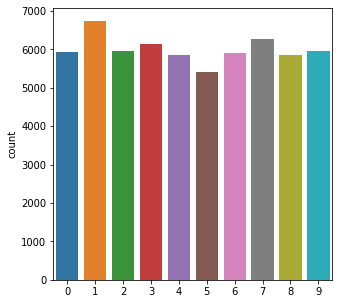

In [ ]:
plt.figure(figsize=(5,5))
g = sns.countplot(training_labels)
plt.show()

5


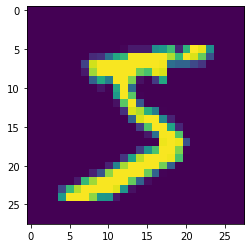

In [ ]:
plt.imshow(training_images[0])
print(training_labels[0])
# print(training_images[0])

In [ ]:
training_images = training_images.reshape(60000,28,28,1)
test_images = test_images.reshape(10000,28,28,1)

In [ ]:
random_seed = 2

In [ ]:
training_images  = training_images / 255.0
test_images = test_images / 255.0

In [ ]:
training_labels = to_categorical(training_labels, num_classes = 10)
test_labels = to_categorical(test_labels, num_classes = 10)

In [ ]:
test_labels[0]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.], dtype=float32)

In [ ]:
model = Sequential()

model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu', input_shape = (28,28,1)))
model.add(BatchNormalization())
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2)))
# model.add(Dropout(0.25))


model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(BatchNormalization())
model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
# model.add(Dropout(0.25))


model.add(Flatten())
model.add(Dense(256, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(10, activation = "softmax"))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 28, 28, 32)        832       
_________________________________________________________________
batch_normalization_4 (Batch (None, 28, 28, 32)        128       
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 28, 28, 32)        25632     
_________________________________________________________________
batch_normalization_5 (Batch (None, 28, 28, 32)        128       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
batch_normalization_6 (Batch (None, 14, 14, 64)       

In [ ]:
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])
learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy', 
                                            patience=3, 
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=0.00001)

In [ ]:
epochs = 30
batch_size = 86

In [ ]:
datagen = ImageDataGenerator(
        featurewise_center=False,  
        samplewise_center=False, 
        featurewise_std_normalization=False,    
        samplewise_std_normalization=False, 
        zca_whitening=False,  
        rotation_range=10, 
        zoom_range = 0.1,
        width_shift_range=0.1, 
        height_shift_range=0.1, 
        horizontal_flip=False, 
        vertical_flip=False) 


datagen.fit(training_images)

In [ ]:
history = model.fit(datagen.flow(training_images,training_labels, batch_size=batch_size),
                              epochs = epochs, 
                              validation_data = (test_images,test_labels),
                              verbose = 2, steps_per_epoch=training_images.shape[0] // batch_size,
                              callbacks=[learning_rate_reduction])

Epoch 1/30
697/697 - 26s - loss: 0.0813 - accuracy: 0.9784 - val_loss: 0.0441 - val_accuracy: 0.9882
Epoch 2/30
697/697 - 25s - loss: 0.0688 - accuracy: 0.9818 - val_loss: 0.0179 - val_accuracy: 0.9947
Epoch 3/30
697/697 - 25s - loss: 0.0600 - accuracy: 0.9836 - val_loss: 0.0234 - val_accuracy: 0.9934
Epoch 4/30
697/697 - 25s - loss: 0.0519 - accuracy: 0.9858 - val_loss: 0.0261 - val_accuracy: 0.9926
Epoch 5/30
697/697 - 25s - loss: 0.0477 - accuracy: 0.9872 - val_loss: 0.0191 - val_accuracy: 0.9946

Epoch 00005: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
Epoch 6/30
697/697 - 25s - loss: 0.0319 - accuracy: 0.9914 - val_loss: 0.0157 - val_accuracy: 0.9952
Epoch 7/30
697/697 - 25s - loss: 0.0289 - accuracy: 0.9915 - val_loss: 0.0159 - val_accuracy: 0.9950
Epoch 8/30
697/697 - 25s - loss: 0.0273 - accuracy: 0.9921 - val_loss: 0.0126 - val_accuracy: 0.9961
Epoch 9/30
697/697 - 25s - loss: 0.0250 - accuracy: 0.9931 - val_loss: 0.0148 - val_accuracy: 0.9953
Epoch 10/3

Minimum Validation Loss: 0.0121


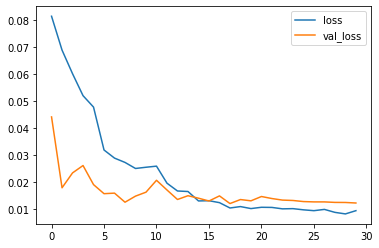

In [ ]:
history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot()
print("Minimum Validation Loss: {:0.4f}".format(history_df['val_loss'].min()))
